In [1]:
from src.model import PyTradeShifts
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns   
import country_converter as coco

In [2]:
print(os.getcwd())
# Go up one directory to get to the data folder
data_dir = os.path.join(os.path.dirname(os.getcwd()))
os.chdir(data_dir)
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts/scripts
/home/florian/Documents/GitHub/pytradeshifts


In [3]:
ISIMIP = pd.read_csv("." + "/data/scenario_files/ISIMIP_wheat_Hedlung.csv", index_col=0)

In [4]:
ISIMIP.head()


,yield_change
name,
Indonesia,NaN
Malaysia,NaN
Chile,32.358411
Bolivia,2.438740
Peru,54.821289


In [5]:
ISIMIP.columns

Index(['yield_change'], dtype='object')

In [6]:
nan_indices = ISIMIP.index[ISIMIP.iloc[:, 0].isnull()].tolist()

In [7]:
type(nan_indices)

list

In [8]:
Wheat2018 = PyTradeShifts("Wheat", 2018, region="Global", testing=True, countries_to_remove=nan_indices)

In [9]:
Wheat2018.load_data()

Loaded data for Wheat in Y2018.


In [10]:
Wheat2018.remove_countries()

In [11]:
Wheat2018.remove_net_zero_countries()

In [12]:
Wheat2018.prebalance()

In [13]:
Wheat2018.correct_reexports()


In [14]:
df = pd.read_clipboard(index_col=0)
df.describe()

,Armenia,Afghanistan,Albania,Algeria,Argentina,Australia,Austria,Bangladesh,Bhutan,Bolivia (Plurinational State of),...,Ethiopia,Yemen,Zambia,Belgium,Luxembourg,Serbia,Montenegro,Sudan,South Sudan,Palestine
count,112.000000,112.000000,112.000000,1.120000e+02,112.000000,112.000000,112.000000,1.120000e+02,112.0,112.000000,...,112.000000,1.120000e+02,112.000000,1.120000e+02,112.000000,112.000000,112.000000,1.120000e+02,112.000000,112.000000
mean,2430.863092,3856.910700,2394.669624,7.519687e+04,0.019652,0.589161,5706.098211,4.320811e+04,0.0,678.499995,...,7209.330328,2.715717e+04,71.964271,2.789911e+04,928.757420,81.100667,202.572095,2.237684e+04,0.017824,40.142823
std,25319.104825,36454.253655,18450.564258,5.321423e+05,0.196234,4.421537,31793.057153,2.174046e+05,0.0,7178.566764,...,38756.193727,1.487917e+05,633.711539,2.214306e+05,6258.367289,528.049663,1559.941961,2.031711e+05,0.120622,423.362574
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,2.050800e-03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,0.001531,0.011982,0.854115,1.223233e+02,0.000000,0.000000,4.078900,2.210875e-01,0.0,0.000000,...,1.443550,2.946300e+00,0.577923,2.098263e+02,5.480300,0.030371,0.000330,5.287250e-01,0.000000,0.000000
max,267973.915900,384867.226600,182890.653800,5.412940e+06,2.074000,43.542300,279444.694600,1.856002e+06,0.0,75970.997800,...,254621.890300,1.346143e+06,6696.107200,2.295428e+06,61150.087300,4071.416800,14428.487800,2.144662e+06,1.213100,4480.561400


In [15]:
Wheat2018.trade_matrix.describe()

,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,Belarus,...,Uganda,Ukraine,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
count,1.130000e+02,113.000000,1.130000e+02,1.130000e+02,113.000000,1.130000e+02,113.000000,1.130000e+02,1.130000e+02,1.130000e+02,...,113.000000,1.130000e+02,1.130000e+02,1.130000e+02,113.000000,1.130000e+02,1.130000e+02,1.130000e+02,113.000000,113.000000
mean,3.579889e+04,4499.971663,1.097630e+05,7.042813e+04,4068.202002,1.221825e+05,14394.151153,2.640276e+04,5.255470e+04,1.859392e+04,...,3574.135813,1.214883e+05,1.327412e+05,3.362883e+05,3625.049597,6.823432e+04,3.847628e+04,2.756165e+04,1084.272732,1065.890414
std,3.414817e+05,28952.256445,6.446789e+05,7.486611e+05,30631.240340,1.298808e+06,97573.312081,1.996448e+05,2.381519e+05,1.724154e+05,...,24270.951201,1.291109e+06,1.246129e+06,3.372894e+06,38493.806821,5.506871e+05,2.514812e+05,1.473745e+05,10779.455311,5656.759102
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000e+00,0.000000,1.381170e-03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,2.032657e-03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,2.775671e-02,1.144803,1.446084e+02,0.000000e+00,0.002440,0.000000e+00,4.627255,7.213051e-02,5.048397e-01,1.495400e-02,...,3.108050,3.821599e-02,3.473765e+02,9.027659e-01,0.000000,1.549677e-01,3.890481e+00,1.943203e+00,0.818667,1.998987
max,3.613300e+06,240294.000000,5.412390e+06,7.958376e+06,267974.489508,1.380652e+07,986715.811871,1.991683e+06,1.856073e+06,1.812949e+06,...,245203.572185,1.372471e+07,1.324803e+07,3.580682e+07,409198.412776,5.410760e+06,2.479808e+06,1.337037e+06,114462.730000,44997.384864


In [16]:
Wheat2018.remove_below_percentile()

Removed countries with trade below the 75th percentile.


In [17]:
Wheat2018.build_graph()

In [18]:
Wheat2018.find_trade_communities()

Removed community {'Bhutan'} with only one country.
Removed community {'Niger'} with only one country.


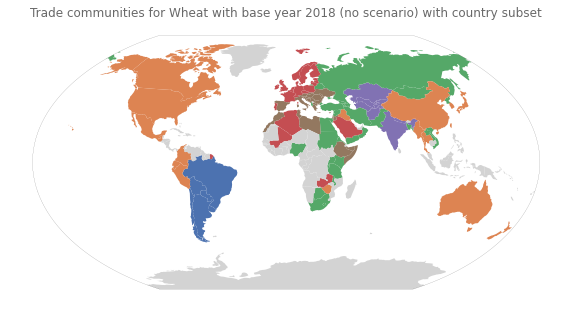

In [19]:
Wheat2018.plot_trade_communities()

In [20]:
df.describe()

,Armenia,Afghanistan,Albania,Algeria,Argentina,Australia,Austria,Bangladesh,Bhutan,Bolivia (Plurinational State of),...,Ethiopia,Yemen,Zambia,Belgium,Luxembourg,Serbia,Montenegro,Sudan,South Sudan,Palestine
count,112.000000,112.000000,112.000000,1.120000e+02,112.000000,112.000000,112.000000,1.120000e+02,112.0,112.000000,...,112.000000,1.120000e+02,112.000000,1.120000e+02,112.000000,112.000000,112.000000,1.120000e+02,112.000000,112.000000
mean,2430.863092,3856.910700,2394.669624,7.519687e+04,0.019652,0.589161,5706.098211,4.320811e+04,0.0,678.499995,...,7209.330328,2.715717e+04,71.964271,2.789911e+04,928.757420,81.100667,202.572095,2.237684e+04,0.017824,40.142823
std,25319.104825,36454.253655,18450.564258,5.321423e+05,0.196234,4.421537,31793.057153,2.174046e+05,0.0,7178.566764,...,38756.193727,1.487917e+05,633.711539,2.214306e+05,6258.367289,528.049663,1559.941961,2.031711e+05,0.120622,423.362574
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,0.000000,0.000000e+00,0.000000,2.050800e-03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,0.001531,0.011982,0.854115,1.223233e+02,0.000000,0.000000,4.078900,2.210875e-01,0.0,0.000000,...,1.443550,2.946300e+00,0.577923,2.098263e+02,5.480300,0.030371,0.000330,5.287250e-01,0.000000,0.000000
max,267973.915900,384867.226600,182890.653800,5.412940e+06,2.074000,43.542300,279444.694600,1.856002e+06,0.0,75970.997800,...,254621.890300,1.346143e+06,6696.107200,2.295428e+06,61150.087300,4071.416800,14428.487800,2.144662e+06,1.213100,4480.561400
